Original shape: (183, 275, 3)


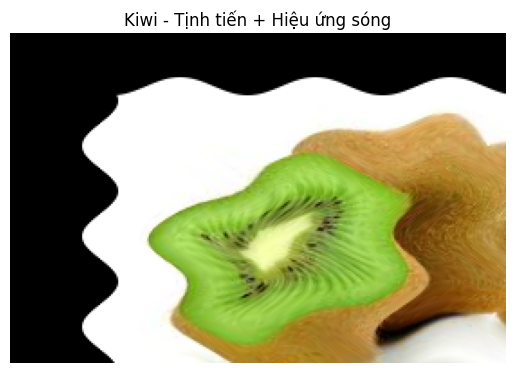

In [4]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import shift, map_coordinates

# Bước 1: Đọc ảnh kiwi
img = iio.imread('exercise/kiwi.jpeg')  # Đảm bảo ảnh kiwi đã cắt sẵn
print("Original shape:", img.shape)

# Bước 2: Tịnh tiến ảnh (sang phải 50px, xuống 30px)
shifted = shift(img, shift=(30, 50, 0))  # (dy, dx, kênh màu)

# Bước 3: Tạo hiệu ứng sóng (wave) theo sin
rows, cols, ch = shifted.shape
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))

# Hiệu ứng sóng theo trục X
X_wave = X + 10 * np.sin(2 * np.pi * Y / 50)  # Độ lệch X theo sin
Y_wave = Y + 5 * np.sin(2 * np.pi * X / 75)   # Độ lệch Y theo sin (tùy chọn)

# Chuẩn bị mảng output
warped = np.zeros_like(shifted)

for i in range(3):  # Lặp qua 3 kênh màu
    warped[:, :, i] = map_coordinates(shifted[:, :, i], [Y_wave, X_wave], order=1, mode='reflect')

# Bước 4: Lưu kết quả
iio.imwrite('exercise/kiwi_wave.jpg', warped.astype(np.uint8))

# Bước 5: Hiển thị ảnh
plt.imshow(warped)
plt.title("Kiwi - Tịnh tiến + Hiệu ứng sóng")
plt.axis('off')
plt.show()



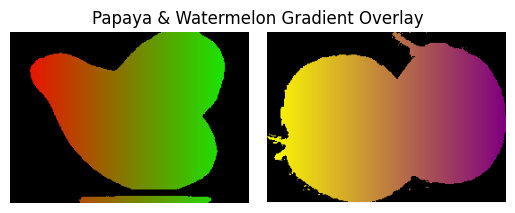

In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Hàm tạo gradient màu
def apply_gradient(image, color_start, color_end):
    h, w = image.shape[:2]
    gradient = np.linspace(0, 1, w)
    gradient = np.tile(gradient, (h, 1))

    # Tạo ảnh mới với 3 kênh
    new_img = np.zeros((h, w, 3), dtype=np.float32)
    for i in range(3):  # RGB
        new_img[:, :, i] = color_start[i] * (1 - gradient) + color_end[i] * gradient

    # Nếu ảnh đầu vào có alpha, nhân theo mặt nạ
    if image.shape[2] == 4:
        mask = image[:, :, 3] / 255.0  # alpha
        new_img = (new_img.T * mask.T).T

    return new_img.astype(np.uint8)

# Bước 1: Đọc ảnh đu đủ và dưa hấu
papaya = iio.imread('exercise/dudu.png')    # Ảnh có nền trong
watermelon = iio.imread('exercise/duahau.png')

# Bước 2: Áp dụng gradient màu
# Đu đủ: đỏ (255,0,0) → xanh lá (0,255,0)
papaya_colored = apply_gradient(papaya, (255, 0, 0), (0, 255, 0))

# Dưa hấu: vàng (255,255,0) → tím (128,0,128)
watermelon_colored = apply_gradient(watermelon, (255, 255, 0), (128, 0, 128))

# Bước 3: Tạo nền trong suốt đủ lớn để ghép 2 quả
height = max(papaya.shape[0], watermelon.shape[0])
width = papaya.shape[1] + watermelon.shape[1] + 20  # thêm khoảng cách giữa 2 ảnh

canvas = np.zeros((height, width, 4), dtype=np.uint8)  # 4 kênh RGBA

# Bước 4: Gắn ảnh vào nền (với alpha=255 nếu không có kênh alpha)
# Papaya bên trái
h1, w1 = papaya_colored.shape[:2]
canvas[:h1, :w1, :3] = papaya_colored
canvas[:h1, :w1, 3] = 255  # alpha

# Watermelon bên phải
h2, w2 = watermelon_colored.shape[:2]
canvas[:h2, w1 + 20:w1 + 20 + w2, :3] = watermelon_colored
canvas[:h2, w1 + 20:w1 + 20 + w2, 3] = 255

# Bước 5: Lưu kết quả
iio.imwrite('exercise/fruit_gradient.png', canvas)

# Hiển thị
plt.imshow(canvas)
plt.axis('off')
plt.title("Papaya & Watermelon Gradient Overlay")
plt.show()


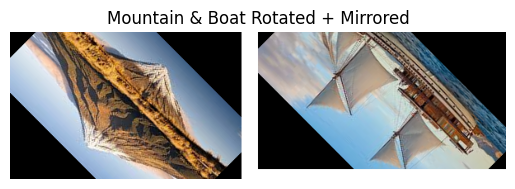

In [12]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# Bước 1: Đọc ảnh núi và thuyền
mountain = iio.imread('exercise/nui.jpeg')      # Đổi tên ảnh phù hợp
boat = iio.imread('exercise/thuyen.jpeg')

# Bước 2: Xoay 45 độ, giữ kích thước cũ
mountain_rot = rotate(mountain, angle=45, reshape=False)
boat_rot = rotate(boat, angle=45, reshape=False)

# Bước 3: Phản chiếu dọc (trục thẳng đứng)
mountain_mirror = np.flipud(mountain_rot)
boat_mirror = np.flipud(boat_rot)

# Bước 4: Tạo canvas trắng (kích thước đủ chứa cả 2 ảnh xếp ngang)
h = max(mountain_mirror.shape[0], boat_mirror.shape[0])
w = mountain_mirror.shape[1] + boat_mirror.shape[1] + 20  # khoảng cách giữa ảnh
canvas = np.ones((h, w, 3), dtype=np.uint8) * 255  # ảnh trắng

# Dán ảnh núi bên trái
mh, mw = mountain_mirror.shape[:2]
canvas[0:mh, 0:mw] = mountain_mirror

# Dán ảnh thuyền bên phải
bh, bw = boat_mirror.shape[:2]
canvas[0:bh, mw + 20:mw + 20 + bw] = boat_mirror

# Bước 5: Lưu ảnh kết quả
iio.imwrite('exercise/mountain_boat_mirror.jpg', canvas)

# Hiển thị
plt.imshow(canvas)
plt.title("Mountain & Boat Rotated + Mirrored")
plt.axis('off')
plt.show()


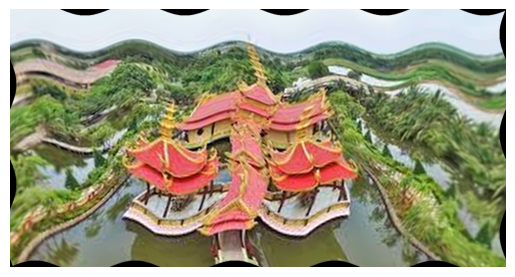

In [3]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# B1: Đọc ảnh ngôi chùa
data = iio.imread('exercise/chua.jpeg')

# B2: Phóng to ảnh lên 5 lần
data_zoomed = nd.zoom(data, (5, 5, 1))  # zoom theo chiều cao, rộng, kênh giữ nguyên

# B3: Hàm biến đổi tạo hiệu ứng uốn cong
def warp(coord):
    y, x = coord[:2]  # chỉ lấy y, x
    new_y = y + 20 * np.sin(x / 50.0)
    new_x = x + 20 * np.sin(y / 50.0)
    return new_y, new_x

# B4: Áp dụng biến đổi lên từng kênh màu (do ảnh là RGB)
warped_channels = []
for c in range(3):  # với mỗi kênh R, G, B
    warped_c = nd.geometric_transform(data_zoomed[:, :, c], warp, order=1)
    warped_channels.append(warped_c)

# Ghép các kênh lại thành ảnh RGB hoàn chỉnh
warped = np.stack(warped_channels, axis=2)

# B5: Hiển thị ảnh kết quả
plt.imshow(warped.astype(np.uint8))
plt.axis('off')
plt.show()

# B6: Lưu ảnh
iio.imwrite('exercise/chua_warped.jpg', warped.astype(np.uint8))


Chọn một trong 3 ảnh sau:
1. image1.jpg
2. image2.jpg
3. image3.jpg

Chọn phép biến đổi:
T. Tịnh tiến
X. Xoay
Z. Zoom/phóng to-thu nhỏ
G. Làm mờ Gaussian
S. Biến dạng sóng (sin)


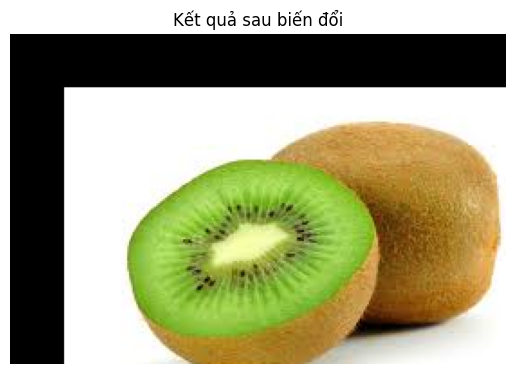

Đã lưu ảnh kết quả vào exercise/result_transformed.jpg


In [5]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# === B1: Chọn ảnh ===
print("Chọn một trong 3 ảnh sau:")
print("1. image1.jpg")
print("2. image2.jpg")
print("3. image3.jpg")
choice = input("Nhập số ảnh (1-3): ")

img_paths = {
    '1': 'exercise/kiwi.jpeg',
    '2': 'exercise/chua.jpeg',
    '3': 'exercise/duahau.png'
}

if choice not in img_paths:
    print("Lựa chọn không hợp lệ!")
    exit()

data = iio.imread(img_paths[choice])

# === B2: Hiển thị menu thao tác ===
print("\nChọn phép biến đổi:")
print("T. Tịnh tiến")
print("X. Xoay")
print("Z. Zoom/phóng to-thu nhỏ")
print("G. Làm mờ Gaussian")
print("S. Biến dạng sóng (sin)")
option = input("Nhập ký tự tương ứng (T/X/Z/G/S): ").upper()

result = None

# === B3: Thực hiện biến đổi ===
if option == 'T':
    dx = int(input("Nhập số pixel tịnh tiến theo trục x: "))
    dy = int(input("Nhập số pixel tịnh tiến theo trục y: "))
    result = nd.shift(data, (dy, dx, 0))

elif option == 'X':
    angle = float(input("Nhập góc xoay (độ): "))
    reshape_opt = input("Reshape? (True/False): ").strip().lower() == 'true'
    result = nd.rotate(data, angle, reshape=reshape_opt)

elif option == 'Z':
    zoom_factor = float(input("Nhập hệ số zoom (ví dụ 2.0 hoặc 0.5): "))
    result = nd.zoom(data, (zoom_factor, zoom_factor, 1))

elif option == 'G':
    sigma = float(input("Nhập giá trị sigma cho Gaussian blur: "))
    result = nd.gaussian_filter(data, sigma=(sigma, sigma, 0))

elif option == 'S':
    amplitude = float(input("Nhập biên độ sóng: "))
    
    def wave(coord):
        y, x = coord[:2]
        new_y = y + amplitude * np.sin(x / 50.0)
        new_x = x + amplitude * np.sin(y / 50.0)
        return new_y, new_x

    # Áp dụng wave lên từng kênh
    result_channels = []
    for c in range(3):
        ch = nd.geometric_transform(data[:, :, c], wave)
        result_channels.append(ch)
    result = np.stack(result_channels, axis=2)

else:
    print("Lựa chọn không hợp lệ.")
    exit()

# === B4: Hiển thị và lưu ảnh kết quả ===
plt.imshow(result.astype(np.uint8))
plt.axis('off')
plt.title("Kết quả sau biến đổi")
plt.show()

# Lưu kết quả
iio.imwrite("exercise/result_transformed.jpg", result.astype(np.uint8))
print("Đã lưu ảnh kết quả vào exercise/result_transformed.jpg")
